<h1><center>DS 300: Homework 4 - Dimensionality Reduction</center></h1>

## Introduction

In this homework, we will apply dimensionality reduction as a data preprocessing technique for images .

The [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) tells us that the more features we have for a model, the more data we need to train the model. In another word, given a fixed amount of training data, model accuracy is likely to decrease for every feature you have.

Taking an image dataset, each row (record) of the dataset is represented by a flattened image, where the columns are represented by the number of pixels. So for a 64x64 image we will have 4096 features! One way to reduce that number (and hopefully produce a more accurate model) is to effectively compress the image without losing much information (the structure of the image). 

For the example in this assignment, we're going to use [PCA](https://arxiv.org/pdf/1404.1100v1.pdf) and [LDA](https://en.wikipedia.org/w/index.php?title=Linear_discriminant_analysis&oldid=922664125).

## Dataset

Sign languages (also known as signed languages) are languages that use manual communication to convey meaning. This can include simultaneously employing hand gestures, movement, orientation of the fingers, arms or body, and facial expressions to convey a speaker's ideas. Source: https://en.wikipedia.org/wiki/Sign_language

#### Turkey Ankara Ayrancı Anadolu High School's Sign Language Digits Dataset [Link](https://github.com/ardamavi/Sign-Language-Digits-Dataset)
This dataset is prepared by our school students.

#### Details of datasets:
+ Image size: 64 x 64 pixels
+ Color space: RGB
+ Number of classes: 10 (Digits: 0-9)
+ Number of participant students: 218
+ Number of samples per student: 10

#### Download from here:
+ hw4_X.npy: [link](https://github.com/BlueJayADAL/DS300/raw/master/datasets/hw4_X.npy)
+ hw4_Y.npy: [link](https://github.com/BlueJayADAL/DS300/raw/master/datasets/hw4_Y.npy)

## Question 1:
#### Import necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in the 'X.npy' dataset into a matrix X by using `load` method from Numpy. 

In [30]:
X = np.load('hw4_X.npy')


X.shape

(2062, 64, 64)

#### As expected, the Sign-language-digits-dataset is formed of 2062 images, each 64x64.
#### Let's have a look at what the first image looks like by using `imshow()`

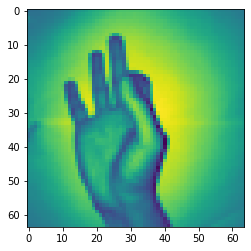

In [31]:
plt.imshow(X[0])
plt.show()




#### This sign is '9' according to [link](https://github.com/ardamavi/Sign-Language-Digits-Dataset)

## Question 2:

#### The `Y` dataset gives us the labels for these images, let's load it into a matrix Y.

In [32]:
Y = np.load('hw4_Y.npy')

Y.shape

(2062, 10)

#### Let's take a look at the label for the first image.

In [33]:
Y[0]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Y[0] should tell us the sign is '9'. However, very weirdly, we see a reversely ordered vector (it should be [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] instead). Let's design a function `conv_label` to convert the vector into a single integer that represents the sign.

In [34]:
def conv_label(Y_vector):
    return np.where(np.flip(Y_vector)==1)[0][0]


In [35]:
# Test the conv_label function
print('Label of X[0] is: %d' %conv_label(Y[0]))

Label of X[0] is: 9


## Question 3:

#### Dataset preparation. Let's flatten our image data into 2062 records of 4096 dim vectors (64x64) first.

In [95]:
X_flat = X.reshape(2062, 4096)


X_flat.shape

(2062, 4096)

#### Use the `conv_label` function to convert all the Y labels from a row vector into a scalar number. Generate a numpy array named as `Y_conv`

In [96]:
Y_conv = []
for i in Y:
    temp = conv_label(i)
    Y_conv.append(temp)
Y_conv = np.array(Y_conv)


print('Y_conv[0] is: ', Y_conv[0])
print('Y_conv[599] is: ', Y_conv[599])
print('Dimensionality of Y_conv is: ', Y_conv.shape)

Y_conv[0] is:  9
Y_conv[599] is:  7
Dimensionality of Y_conv is:  (2062,)


#### Train test split. Use random seed as 101, test size as 20%.

In [97]:
from sklearn.model_selection import train_test_split


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y_conv, test_size=.20, random_state=101)



In [99]:
X_train[:5]

array([[0.5568628 , 0.5647059 , 0.57254905, ..., 0.4392157 , 0.43137255,
        0.41960785],
       [0.78431374, 0.7764706 , 0.77254903, ..., 0.7254902 , 0.72156864,
        0.7176471 ],
       [0.54901963, 0.5647059 , 0.5764706 , ..., 0.47843137, 0.46666667,
        0.4509804 ],
       [0.50980395, 0.5254902 , 0.5372549 , ..., 0.39607844, 0.3882353 ,
        0.38039216],
       [0.8352941 , 0.84705883, 0.84705883, ..., 0.7058824 , 0.6901961 ,
        0.6666667 ]], dtype=float32)

In [100]:
y_train[:5]

array([1, 3, 5, 8, 4], dtype=int64)

## Question 4:

#### Normalize X_train and X_test so that they have 0 mean and 1 std. 

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
ss = StandardScaler()


X_train = ss.fit_transform(X_train)


X_test = ss.transform(X_test)



## Question 5:

#### Let's use SVC to build a baseline model, and train the model with the training set. Ensure to use random seed as 101. Note your training latency may differ from mine as we are using different machines.

In [103]:
from sklearn.svm import SVC
import time

In [104]:
start = time.process_time()
clf = SVC(random_state=101)


clf.fit(X_train, y_train)


elapsed_time = time.process_time() - start
print('Training time: ', elapsed_time)

Training time:  9.125


In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [106]:
y_pred = clf.predict(X_test)



print('SVC accuracy: ',accuracy_score(y_test, y_pred))
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))

SVC accuracy:  0.7941888619854721
Confusion matrix: 
 [[41  0  3  0  0  0  0  0  0  1]
 [ 0 28  0  0  1  1  2  6  0  0]
 [ 2  2 36  0  0  2  0  1  0  1]
 [ 2  0  0 27  0  0  3  5  0  1]
 [ 1  0  0  2 35  1  0  8  1  1]
 [ 0  5  2  0  2 39  0  0  0  0]
 [ 0  2  0  5  1  0 34  1  0  0]
 [ 0  2  1  4  2  0  0 19  0  0]
 [ 1  0  0  0  2  1  1  0 34  1]
 [ 2  1  0  2  0  0  0  0  0 35]]


## Question 6:

#### As we can see, this is not an ideal model. Using SVC only achieves ~79% overall accuracy on the test set.

#### Now we will reduce the dimension of our training data and then re-train what we have.

#### The objective here is to reduce the number of dimensions of the image. But before we do that we need to decide how much we need to reduce. To do that we're going to try and find the number of dimensions that keeps 80% of the variance of the original images. A trained PCA object has an `explained_variance_ratio_` attribute for us to know the variance.

In [107]:
from sklearn.decomposition import PCA

In [132]:
# Train pca. Ensure to use random seed as 101, randomized svd and zero mean across the columns. 
pca = PCA(random_state=101, svd_solver='randomized', whiten=True)


pca.fit(X_train)



PCA(random_state=101, svd_solver='randomized', whiten=True)

#### Find the n-th principal component, beyond which the cumulative `explained_variance_ratio` is no less than 0.8. 

In [137]:
#why is this >1?
pca.explained_variance_ratio_.sum()

1.0000005

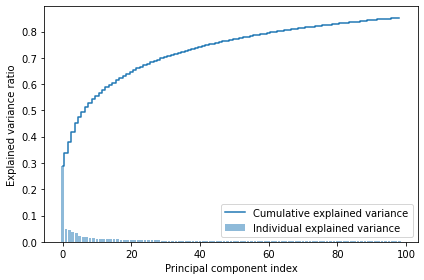

In [173]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)-1550), exp_var_pca[:99], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)-1550), cum_sum_eigenvalues[:99], where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [190]:
#not 64????
d = (cum_sum_eigenvalues<=.80).sum()

print('The first %d principal components explain total variance no less than 0.8.'%d)

The first 63 principal components explain total variance no less than 0.8.


In [186]:
d=0
i=0

while d < 0.8:
    d = np.sum([d,pca.explained_variance_ratio_[i]])
    i = i + 1

print('The first %d principal components explain total variance no less than 0.8.'%i)

The first 64 principal components explain total variance no less than 0.8.


#### Therefore, with PCA, we've gone from 4096 dimensions to just 64 dimensions with just 20% of variance loss! 

## Question 7: 

#### Let's find out how good is this reduced dimensionality.
#### Let's use dimensionality as 64 to train PCA on our training set and transform the data, then print out an image example

In [191]:
# Train pca. Ensure to use random seed as 101, randomized svd and zero mean across the columns. 
pca = PCA(n_components=64, random_state=101, svd_solver='randomized', whiten=True)


# Transform the traning set with PCA.
X_train_reduced = pca.fit_transform(X_train)


# Generate a recovered version from X_train_reduce for plotting.
X_train_recovered = pca.inverse_transform(X_train_reduced)



In [192]:
print('reduced shape: ', X_train_reduced.shape)
print('recovered shape: ', X_train_recovered.shape)

reduced shape:  (1649, 64)
recovered shape:  (1649, 4096)


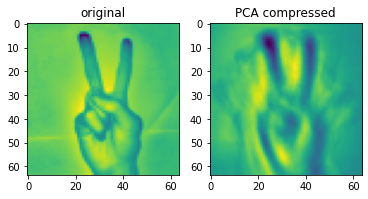

In [193]:
# Plot X[0] and compare the original version vs. PCA compressed verison.

# Use matplotlib OOP style
fig, axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].set_title('original')
axes[0].imshow(X=X_train[0].reshape(64,64))
# Plot for original


# Plot for PCA compressed
axes[1].set_title('PCA compressed')
axes[1].imshow(X=X_train_recovered[0].reshape(64,64))


#### You can see PCA compressed version is far from perfect, but it's still clear what shape the hand is making

## Question 8:

#### Let's retrain our model with the dimensionality reduced training data.

#### First generate X_test_reduced with PCA as well.

In [194]:
X_test_reduced = pca.transform(X_test)



#### Normalize X_train_reduced and X_test_reduced again

In [195]:
ss = StandardScaler()


X_train_reduced = ss.fit_transform(X_train_reduced)


X_test_reduced = ss.transform(X_test_reduced)


#### Retrain SVC with the reduced dataset. Note your training latency may differ from mine as we are using different machines.

In [196]:
start = time.process_time()
clf_reduced = SVC(random_state=101)


clf_reduced.fit(X_train_reduced, y_train)


elapsed_time = time.process_time() - start
print('Training time: ', elapsed_time)

Training time:  0.25


In [198]:
y_pred_reduced = clf_reduced.predict(X_test_reduced)


print('SVC accuracy: ',accuracy_score(y_test, y_pred_reduced))
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred_reduced))

SVC accuracy:  0.8329297820823245
Confusion matrix: 
 [[42  0  3  0  0  0  0  0  0  0]
 [ 0 26  0  1  0  2  2  6  0  1]
 [ 2  3 38  0  0  0  0  0  0  1]
 [ 4  0  0 29  0  0  1  3  0  1]
 [ 0  0  1  0 39  0  1  6  0  2]
 [ 1  0  2  0  1 44  0  0  0  0]
 [ 0  1  0  5  0  1 35  1  0  0]
 [ 0  1  0  3  0  0  1 22  1  0]
 [ 0  0  0  0  0  1  1  0 37  1]
 [ 3  0  0  1  4  0  0  0  0 32]]


#### Notice that we've reduced the training time from over 10 seconds down to less than 1 second while boosting the test accuracy to 83%. 

## Question 9 (20 points):

#### This is an open-ended question. Try your best to boost your test accuracy to over 90%. 
#### This question will be graded based on your final accuracy and how much work you've done to find the optimal solution. 

In [287]:
from sklearn.linear_model import SGDClassifier


In [294]:
sgd_clf = SGDClassifier(random_state=101, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=101)

In [296]:
y_pred = sgd_clf.predict(X_test)

print('SGD accuracy: ',accuracy_score(y_test, y_pred))
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))

SGD accuracy:  0.7263922518159807
Confusion matrix: 
 [[39  0  5  0  0  0  0  0  0  1]
 [ 0 20  1  1  0  6  6  1  1  2]
 [ 5  0 34  0  0  2  0  1  0  2]
 [ 3  0  1 23  1  0  2  7  1  0]
 [ 3  1  1  2 33  1  2  3  1  2]
 [ 0  2  2  1  2 39  0  2  0  0]
 [ 0  5  0  4  2  2 30  0  0  0]
 [ 0  1  1  3  0  4  0 19  0  0]
 [ 0  0  1  1  1  2  1  2 31  1]
 [ 4  0  1  1  1  1  0  0  0 32]]


In [299]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=101)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('SGD accuracy: ',accuracy_score(y_test, y_pred))
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))

SGD accuracy:  0.7990314769975787
Confusion matrix: 
 [[39  0  5  1  0  0  0  0  0  0]
 [ 0 25  0  0  0  2  3  5  1  2]
 [ 4  1 36  0  1  0  1  1  0  0]
 [ 2  0  0 25  2  0  3  2  1  3]
 [ 0  2  0  0 38  2  2  3  0  2]
 [ 0  2  0  0  0 44  0  2  0  0]
 [ 0  1  0  5  1  1 34  1  0  0]
 [ 0  4  0  1  1  1  1 20  0  0]
 [ 0  0  0  3  1  3  1  0 32  0]
 [ 0  1  0  2  0  0  0  0  0 37]]


In [203]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [303]:
model = keras.Sequential(name = 'HW4-CNN')
model.add(layers.Conv2D(32, 
                        kernel_size = (3,3), 
                        activation = 'relu',
                        input_shape= (64, 64, 1)))

model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(32, 
                        kernel_size = (3,3), 
                        activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=10, activation='softmax'))


model.summary()

Model: "HW4-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_14 (Flatten)        (None, 6272)              0   

In [304]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [305]:
history = model.fit_generator(X_train.reshape(1649, 64, 64,1), 
                              epochs=10, 
                              validation_data=(X_test.reshape(413, 64, 64,1), y_test)
)


score = model.evaluate(X_test.reshape(413, 64, 64,1))

print('Test loss:',score[0] )
print('Test accuracy:',score[1])

Epoch 1/10


C:\Users\augus\AppData\Local\Temp\ipykernel_8804\1991166230.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(X_train.reshape(1649, 64, 64,1),


ValueError: in user code:

    File "C:\Users\augus\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\augus\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\augus\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\augus\anaconda3\lib\site-packages\keras\engine\training.py", line 891, in train_step
        self._validate_target_and_loss(y, loss)
    File "C:\Users\augus\anaconda3\lib\site-packages\keras\engine\training.py", line 848, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=categorical_crossentropy, and therefore expects target data to be provided in `fit()`.


I am not sure why this error message is occuring, I added validation data into fit() but it is not changing anythong.

# Great Job!